In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataset')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
# Load the dataset
data = pd.read_excel('dataset.xlsx')
# Get the shape of the dataset
data_shape = data.shape
print(f"The dataset has {data_shape[0]} rows and {data_shape[1]} columns.")

The dataset has 5644 rows and 111 columns.


First few rows of the dataset:
        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3      

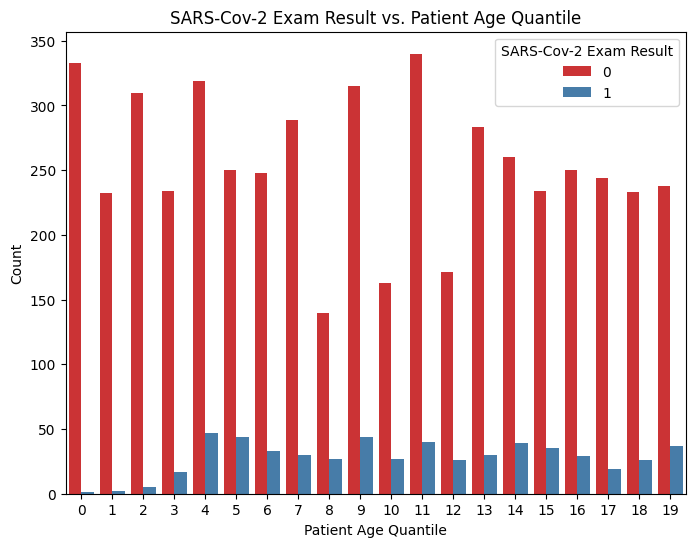

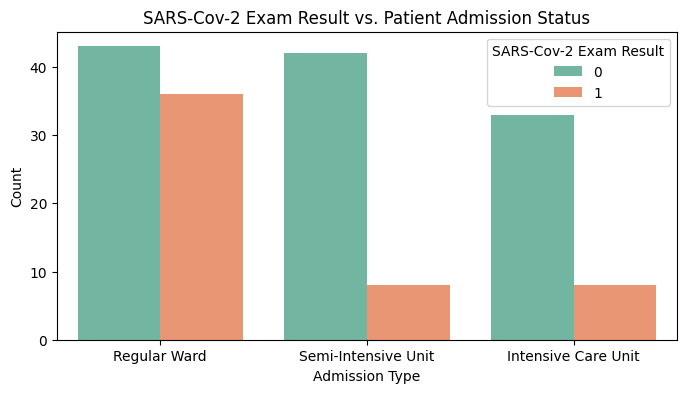

<ipython-input-15-0e90c8627366>:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['critical_event'] = np.where(



Training Logistic Regression with Cubic Splines...

Logistic Regression with Cubic Splines Performance:
AUC: 0.923
Brier Score: 0.021
Accuracy: 0.975
Precision: 0.652
Recall: 0.357
F1 Score: 0.462

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1369
           1       0.65      0.36      0.46        42

    accuracy                           0.98      1411
   macro avg       0.82      0.68      0.72      1411
weighted avg       0.97      0.98      0.97      1411


Training Lasso Logistic Regression...

Lasso Logistic Regression Performance:
AUC: 0.734
Brier Score: 0.025
Accuracy: 0.970
Precision: 0.471
Recall: 0.190
F1 Score: 0.271

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1369
           1       0.47      0.19      0.27        42

    accuracy                           0.97      1411
   macro avg       0.72      0.59    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance:
AUC: 0.942
Brier Score: 0.019
Accuracy: 0.974
Precision: 0.619
Recall: 0.310
F1 Score: 0.413

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1369
           1       0.62      0.31      0.41        42

    accuracy                           0.97      1411
   macro avg       0.80      0.65      0.70      1411
weighted avg       0.97      0.97      0.97      1411


Training Gradient Boosting...

Gradient Boosting Performance:
AUC: 0.956
Brier Score: 0.019
Accuracy: 0.975
Precision: 0.630
Recall: 0.405
F1 Score: 0.493

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1369
           1       0.63      0.40      0.49        42

    accuracy                           0.98      1411
   macro avg       0.81      0.70      0.74      1411
weighted avg       0.97      0.98      0.97      1411


Training Neural Netw

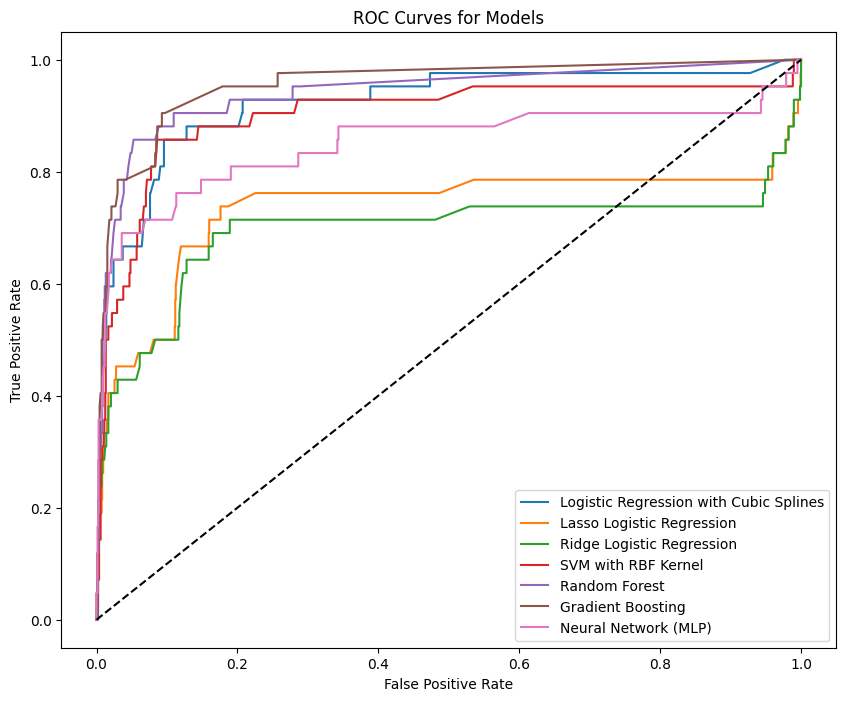

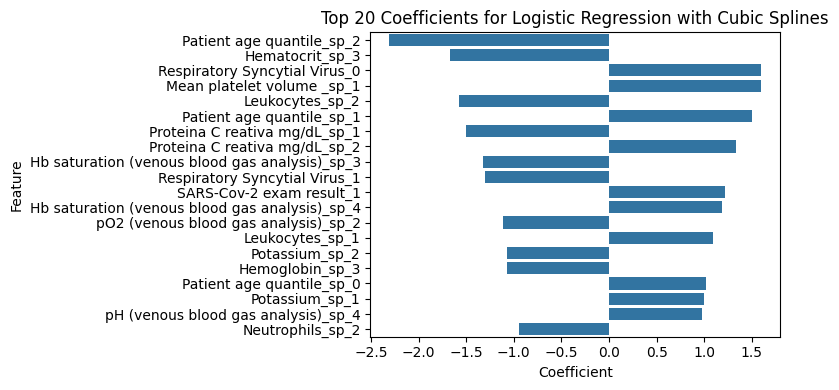

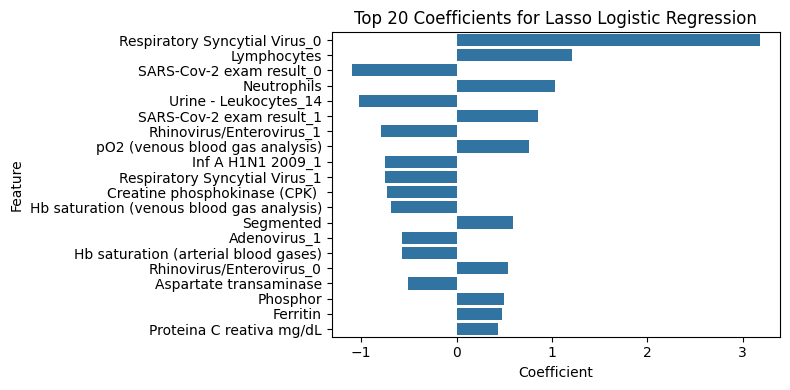

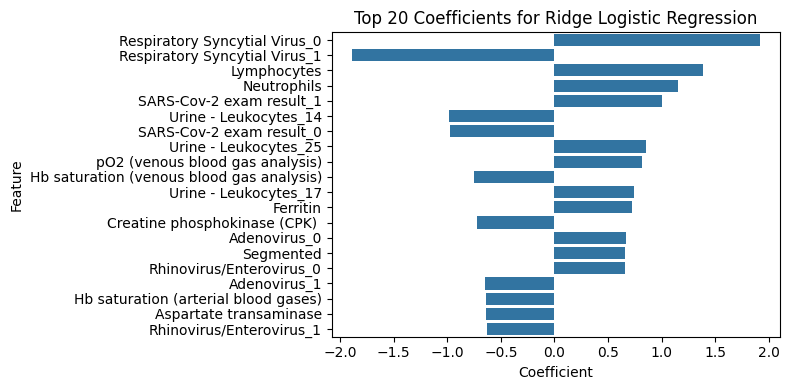

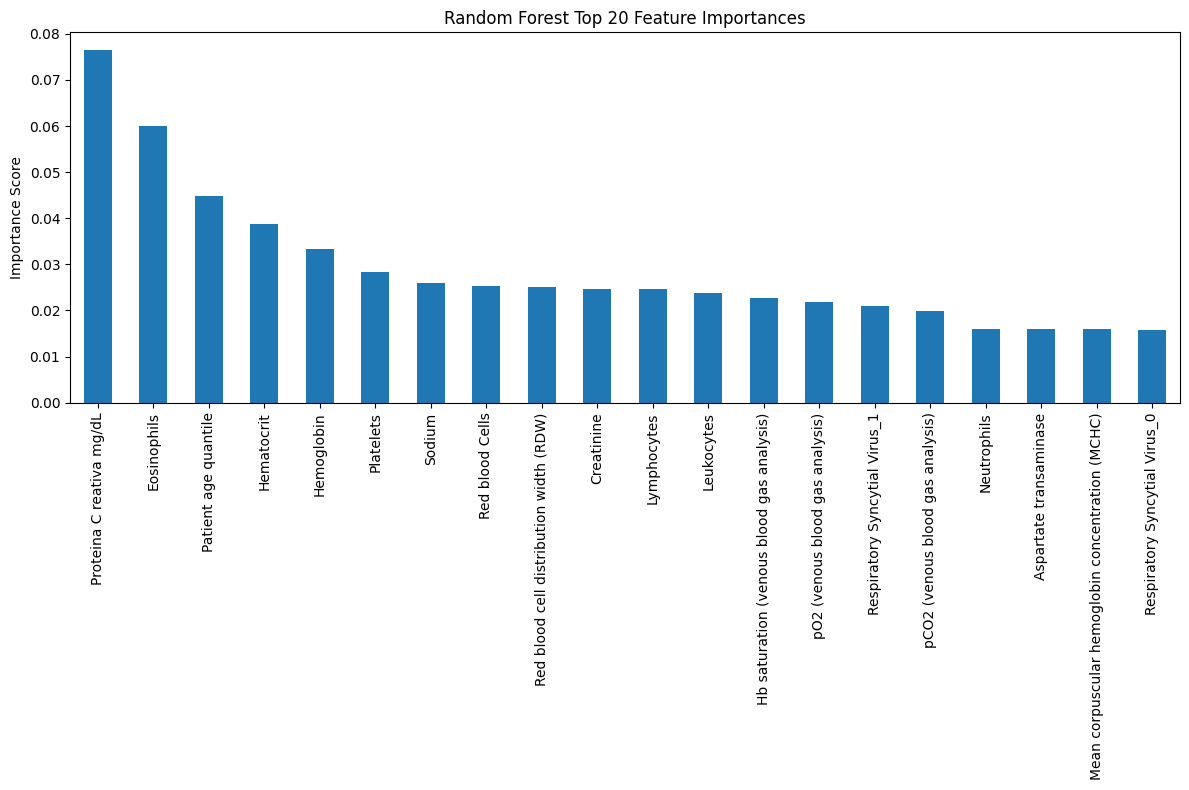

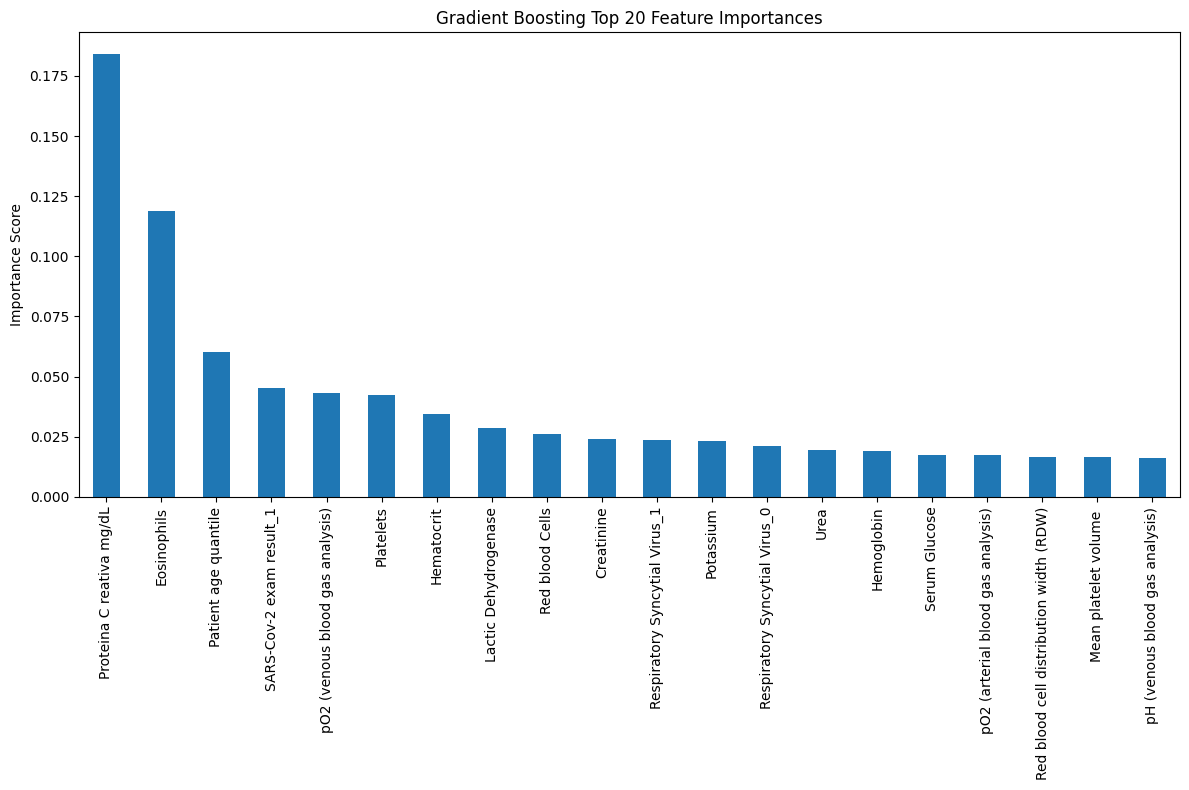

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, SplineTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, brier_score_loss, roc_curve, accuracy_score,
    precision_score, recall_score, f1_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns  # For enhanced plotting
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Data Loading and Preprocessing

# Load the dataset
data = pd.read_excel('dataset.xlsx')

# Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(data.head())

# 1.1. Handle Missing Values

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)




# For the remaining missing values, we'll impute with mean for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove categorical variables from numerical_cols if mistakenly included
categorical_vars_to_remove = [
    'Urine - pH', 'Urine - Density', 'Urine - Sugar', 'Urine - Red blood cells'
]
numerical_cols = [col for col in numerical_cols if col not in categorical_vars_to_remove]

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# For categorical columns, fill missing values with the mode
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Add the additional categorical variables to the list
additional_categorical_vars = [
    'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin',
    'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite',
    'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes',
    'Urine - Crystals', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders',
    'Urine - Yeasts', 'Urine - Color'
]

# Ensure the variables are in the dataset
additional_categorical_vars = [col for col in additional_categorical_vars if col in data.columns]

# Add to categorical_cols if not already present
for col in additional_categorical_vars:
    if col not in categorical_cols:
        categorical_cols.append(col)

# Fill missing values with mode for categorical variables
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# 1.2. Convert Categorical Variables to Numeric

# Identify all categorical variables
categorical_vars = [
    'SARS-Cov-2 exam result', 'Patient ID', 'Respiratory Syncytial Virus',
    'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
    'Rhinovirus/Enterovirus', 'Mycoplasma pneumoniae', 'Coronavirus HKU1',
    'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
    'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis',
    'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test',
    'Influenza A, rapid test', 'Strepto A'
] + additional_categorical_vars  # Include new categorical variables

# Ensure only existing columns are included
categorical_vars = [col for col in categorical_vars if col in data.columns]

# Convert categorical variables to numeric codes
for col in categorical_vars:
    data[col] = data[col].astype('category').cat.codes

# 2. Exploratory Data Analysis (EDA)

# 2.1. Plot SARS-Cov-2 exam result vs. Patient age quantile

# Check if 'Patient age quantile' is in the dataset
if 'Patient age quantile' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(
        x='Patient age quantile',
        hue='SARS-Cov-2 exam result',
        data=data,
        palette='Set1'
    )
    plt.title('SARS-Cov-2 Exam Result vs. Patient Age Quantile')
    plt.xlabel('Patient Age Quantile')
    plt.ylabel('Count')
    plt.legend(title='SARS-Cov-2 Exam Result', loc='upper right')
    plt.show()
else:
    print("'Patient age quantile' column is not in the dataset.")

# 2.2. Plot SARS-Cov-2 exam result vs. Patient admission status

admission_cols = [
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'
]

# Ensure only existing columns are included
admission_cols = [col for col in admission_cols if col in data.columns]

# Melt the admission status columns for plotting
if admission_cols:
    admission_data = data.melt(
        id_vars=['SARS-Cov-2 exam result'],
        value_vars=admission_cols,
        var_name='Admission Type',
        value_name='Admitted'
    )

    # Map the admission types to a cleaner format
    admission_data['Admission Type'] = admission_data['Admission Type'].replace({
        'Patient addmited to regular ward (1=yes, 0=no)': 'Regular Ward',
        'Patient addmited to semi-intensive unit (1=yes, 0=no)': 'Semi-Intensive Unit',
        'Patient addmited to intensive care unit (1=yes, 0=no)': 'Intensive Care Unit'
    })

    # Filter only admitted patients
    admitted_patients = admission_data[admission_data['Admitted'] == 1]

    plt.figure(figsize=(8, 4))
    sns.countplot(
        x='Admission Type',
        hue='SARS-Cov-2 exam result',
        data=admitted_patients,
        palette='Set2'
    )
    plt.title('SARS-Cov-2 Exam Result vs. Patient Admission Status')
    plt.xlabel('Admission Type')
    plt.ylabel('Count')
    plt.legend(title='SARS-Cov-2 Exam Result', loc='upper right')
    plt.show()
else:
    print("Admission status columns are not in the dataset.")

# 3. Feature Engineering

# 3.1. Define the Target Variable

# Define 'critical_event' based on patient admissions
data['critical_event'] = np.where(
    (data['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1) |
    (data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1) |
    (data['Patient addmited to regular ward (1=yes, 0=no)'] == 1),
    1, 0
)

# Ensure 'critical_event' is of integer type
data['critical_event'] = data['critical_event'].astype(int)

# 3.2. Remove Variables Used to Define the Target

variables_to_remove = [
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to regular ward (1=yes, 0=no)'
]

data = data.drop(columns=variables_to_remove)

# 3.3. Remove Identifiers

data = data.drop(columns=['Patient ID'])

# 4. Feature Selection

# Separate features and target
X = data.drop(columns=['critical_event'])
y = data['critical_event']

# 5. Data Splitting and Scaling

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Identify numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Replace NaN values with 0 before scaling
X_train[numerical_features] = X_train[numerical_features].fillna(0)
X_test[numerical_features] = X_test[numerical_features].fillna(0)

# Remove columns with zero variance
zero_variance_columns = X_train[numerical_features].columns[
    X_train[numerical_features].nunique() == 1
]
X_train = X_train.drop(columns=zero_variance_columns)
X_test = X_test.drop(columns=zero_variance_columns)

# Update numerical features list
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identify categorical features
categorical_features = [col for col in X_train.columns if col not in numerical_features]

# 6. Model Implementation and Evaluation

# Define a function to evaluate models
def evaluate_model(y_test, y_pred, y_pred_proba, model_name):
    auc = roc_auc_score(y_test, y_pred_proba)
    brier = brier_score_loss(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"\n{model_name} Performance:")
    print(f"AUC: {auc:.3f}")
    print(f"Brier Score: {brier:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Prepare the preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Models to implement
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression with Cubic Splines': LogisticRegression(max_iter=1000),
    'Lasso Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    'Ridge Logistic Regression': LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000),
    'SVM with RBF Kernel': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network (MLP)': MLPClassifier(
        hidden_layer_sizes=(100,), activation='relu', solver='adam',
        max_iter=200, random_state=42
    )
}

# Prepare the SplineTransformer for numerical features
spline_transformer = SplineTransformer(degree=3, n_knots=4, include_bias=False)

# Create pipelines for each model
pipelines = {}

for model_name, model in models.items():
    if 'Cubic Splines' in model_name:
        # For Logistic Regression with Cubic Splines
        pipelines[model_name] = Pipeline([
            ('preprocessor', ColumnTransformer(
                transformers=[
                    ('spline', spline_transformer, numerical_features),
                    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                ])),
            ('classifier', model)
        ])
    elif 'Neural Network' in model_name:
        # For Neural Network (needs scaled numerical features)
        pipelines[model_name] = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
    else:
        # For other models
        pipelines[model_name] = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

# Train and evaluate each model
for model_name, pipeline in pipelines.items():
    print(f"\nTraining {model_name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM without predict_proba, use decision_function
        y_pred_proba = pipeline.decision_function(X_test)
        # Scale decision_function outputs to [0,1] using a sigmoid function
        y_pred_proba = 1 / (1 + np.exp(-y_pred_proba))

    evaluate_model(y_test, y_pred, y_pred_proba, model_name)

# 7. Model Evaluation Plots

# 7.1. ROC Curves

plt.figure(figsize=(10, 8))

for model_name, pipeline in pipelines.items():
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = pipeline.decision_function(X_test)
        y_pred_proba = 1 / (1 + np.exp(-y_pred_proba))

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 7.2. Feature Importance (Coefficients)

# For Logistic Regression models
for model_name in [
    'Logistic Regression with Cubic Splines',
    'Lasso Logistic Regression',
    'Ridge Logistic Regression'
]:
    model = pipelines[model_name].named_steps['classifier']
    # Get feature names after preprocessing
    preprocessor = pipelines[model_name].named_steps['preprocessor']
    if 'Cubic Splines' in model_name:
        # For spline features
        spline_feature_names = preprocessor.named_transformers_['spline'].get_feature_names_out(numerical_features)
        cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        feature_names = np.concatenate([spline_feature_names, cat_feature_names])
    else:
        # For standard scaled features
        num_feature_names = numerical_features
        cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        feature_names = np.concatenate([num_feature_names, cat_feature_names])

    coefficients = model.coef_.flatten()
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(20)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=coef_df, x='Coefficient', y='Feature', orient='h')
    plt.title(f'Top 20 Coefficients for {model_name}')
    plt.tight_layout()
    plt.show()

# For Random Forest and Gradient Boosting feature importances
for model_name in ['Random Forest', 'Gradient Boosting']:
    model = pipelines[model_name].named_steps['classifier']
    # Get feature names after preprocessing
    preprocessor = pipelines[model_name].named_steps['preprocessor']
    num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features)
    cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([num_feature_names, cat_feature_names])

    importances = model.feature_importances_
    importances_series = pd.Series(importances, index=feature_names)

    plt.figure(figsize=(12, 8))
    importances_series.sort_values(ascending=False).head(20).plot.bar()
    plt.title(f"{model_name} Top 20 Feature Importances")
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()

# Note: For Neural Network and SVM, feature importance is not straightforward due to the nature of the models.



In [9]:
!pip install nbconvert
!sudo apt-get install pandoc
!sudo apt-get install texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc
  texlive-latex-extra context wkhtmltopdf librsvg2-bin groff ghc nodejs php
  python ruby libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc
  pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB

In [17]:
 %%shell
jupyter nbconvert --to pdf /content/MXN442_assignment.ipynb

[NbConvertApp] Converting notebook /content/MXN442_assignment.ipynb to pdf
[NbConvertApp] Support files will be in MXN442_assignment_files/
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Making directory ./MXN442_assignment_files
[NbConvertApp] Writing 111741 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 491621 bytes to /content

In [16]:
!python --version


Python 3.10.12
